Visualização de dados se tornou uma ferramente indispensável em qualquer estudo analítico que visa obter conhecimento/informação a partir de dados, seja em um artigo científico ou em um relatório empresarial. 
Isto se deve ao fato de que a visualização de dados utiliza majoritariamente gráficos! estes que por sua vez expõem objetivamente a relação entre variáveis e existêm inúmeras estruturas gráficas para facilitar a visualização de diferentes formatos de dados.

Este projeto tem como objetivo explorar alguns métodos de visualização de dados com as bibliotecas Seaborn e Matplotlib.pyplot, bem como a extração de alguns insights básicos a partir dos gráficos criados.

Bibliotecas:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Os gráficos serão contruídos utilizando a biblioteca Seaborn enquanto a biblioteca Matplotlib.pyplot
# será utilizada para fazer alterações e implementações nos gráficos.

In [3]:
# Utilizando a bilbioteca Pandas para armazenar o dataset na variável "fifa" utilizando a coluna de data como índice
# das demais colunas:

fifa = pd.read_csv('fifa.csv',  index_col="Date", parse_dates=True)

fifa.head()

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0


Gráfico de linhas:

Gráficos de linha auxiliam na visualização de evoluções temporais, facilitando a visualização de tendências e demais padrões de variação, além disso podemos comparar evoluções temporais de multiplas variáveis em um único plot permitindo uma comparação direta entre elas.

O dataset acima contém um ranking da FIFA de 6 seleções entre os períodos de 1993 até 2018. Podemos visualizar a evolução temporal da pontuação de cada seleção em um gráfico de linha usando "lineplot":

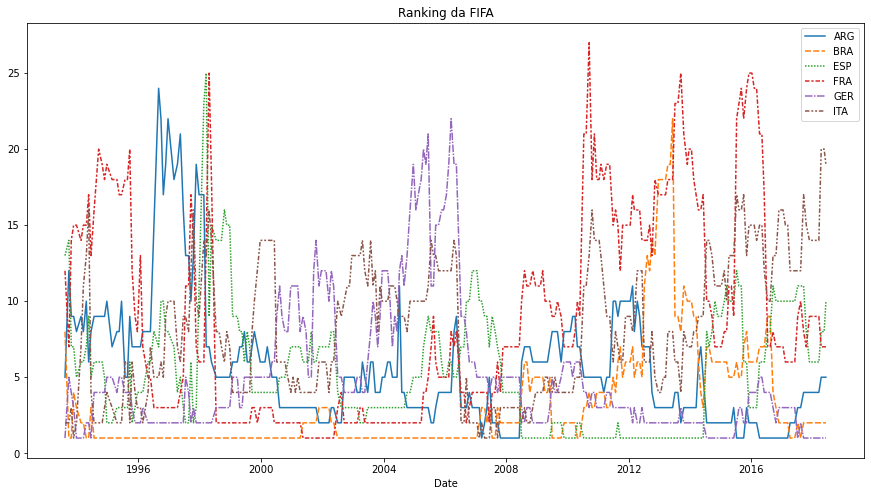

In [4]:
fig = plt.figure(figsize=(15,8)) # alterando a dimensão da figura com (largura, altura) em polegadas

sns.lineplot(data=fifa)          # construindo um gráfico de linhas usando os dados do dataset

plt.title('Ranking da FIFA')     # adicionando um título ao gráfico
plt.show()

A visualização de gráficos de linha podem se tornar bagunçados se tentarmos visualizar muitas variáveis de uma única vez (várias seleções, pelo nosso exemplo). Porém podemos visualizar apenas as seleções de interesse fazendo subplots:

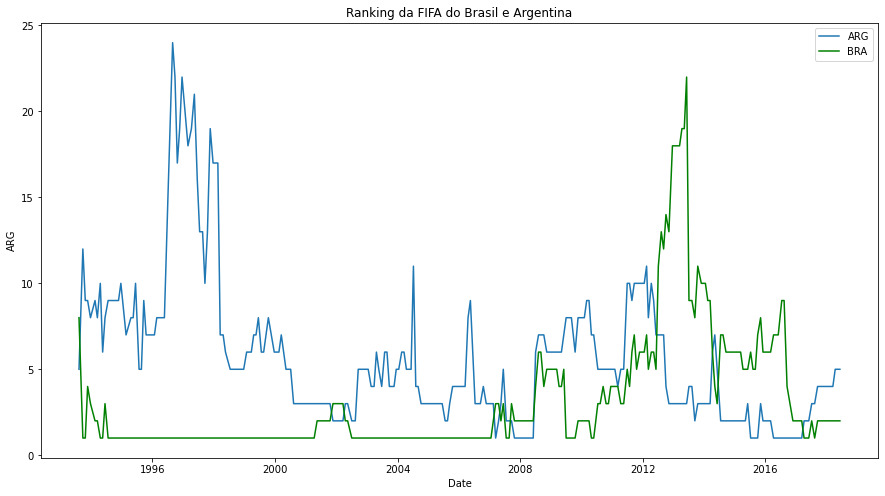

In [5]:
# Visualizando a pontuação no Ranking da FIFA para Brasil e Argentina

fig = plt.figure(figsize=(15,8))

sns.lineplot(data=fifa['ARG'], label='ARG') # criando um gráfico de linha para a Argentina
sns.lineplot(data=fifa['BRA'], label='BRA', color='green') # e para o Brasil (com cor verde)

plt.title('Ranking da FIFA do Brasil e Argentina')
plt.show()

# Com um gráfico de linhas com a pontuação pelo tempo, podemos ver a evolução temporal individual 
# da pontuação de uma seleção e até visualizar com facilidade em qual intervalo de tempo uma seleção
# estava mais bem rankeada.

Pode ser trabalhoso contruir um subplot para cada variável, para contornar este problema, podemos armazenar um conjunto de variáveis em uma lista e depois contruir um único gráfico para as variáveis armazenadas nesta lista.

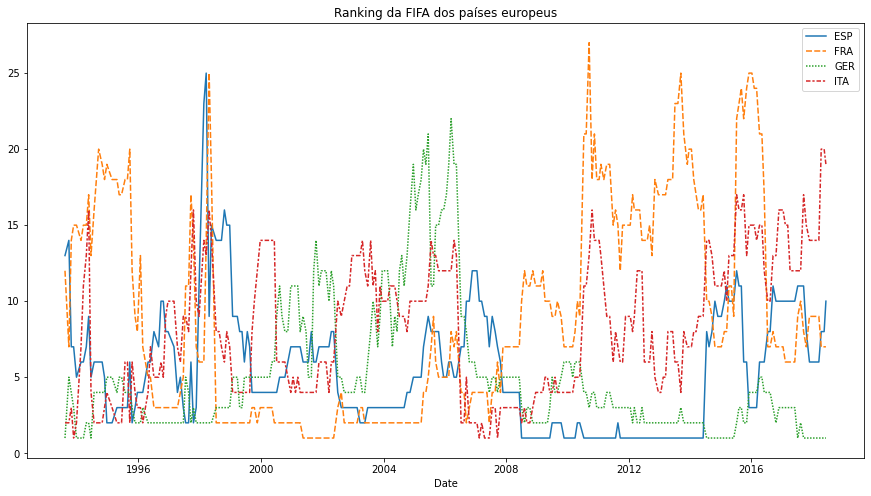

In [6]:
# Visualizando a pontuação das seleções européias

euro = ['ESP', 'FRA', 'GER', 'ITA'] # armazenando as seleções na lista euro

plt.figure(figsize=(15,8))
sns.lineplot(data=fifa[euro]) # contruindo um gráfico de linhas para as variáveis armazenadas na lista

plt.title('Ranking da FIFA dos países europeus')
plt.show()

Gráfico de barras:

Gráficos de barra são excelentes para visualizarmos uma comparação entre diversas variáveis categóricas quando existem valores numéricos associados a cada uma dessas variáveis.

No próximo exemplo, vamos usar um dataset que contém a média da nota de jogos, separados por gênero, para cada plataforma.

In [7]:
ign = pd.read_csv('ign_scores.csv', index_col='Platform') # utilizando a plataforma como índice

ign.head()

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000


Suponha que você adora jogos do gênero RPG e está interessada em saber qual plataforma tem os jogos do seu gênero favorito mais bem avaliados. Para fazer esta comparação entre a média das notas para cada plataforma podemos contruir um gráfico de barras com "Barplot":

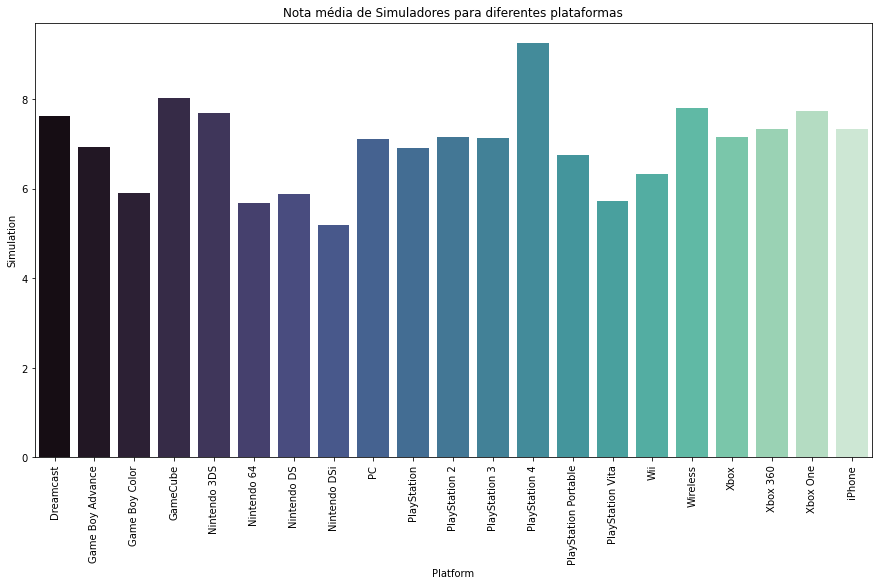

In [8]:
# Suponha que você adora jogos do gênero simulação e está interessada em saber qual plataforma tem os 
# jogos do seu gênero favorito mais bem avaliados

plt.figure(figsize=(15,8))

sns.barplot(x=ign.index, y=ign['Simulation'], palette="mako") # Usando o índice (plataformas) no eixo X e a 
                                                              # pontuação média dos jogos de simulação no eixo Y

plt.title('Nota média de Simuladores para diferentes plataformas')
plt.xticks(rotation=90) # rotacionando os índices do eixo X para que não fiquem sobrepostos
plt.show()

# Podemos ver com o gráfico a baixo que a plataforma "Playstation 4" contém a maior nota média para jogos
# de simulação

Um dos principais exclusivos da plataforma "Xbox One" são a série de jogos de corrida "Forza" que são altamente aclamados pela crítica especializada e jogadores. Podemos então ter a hipótese de que a nota média dos jogos de corrida para a plataforma "Xbox One" é alta e com auxílio de um gráfico podemos testar nossa hipótese:

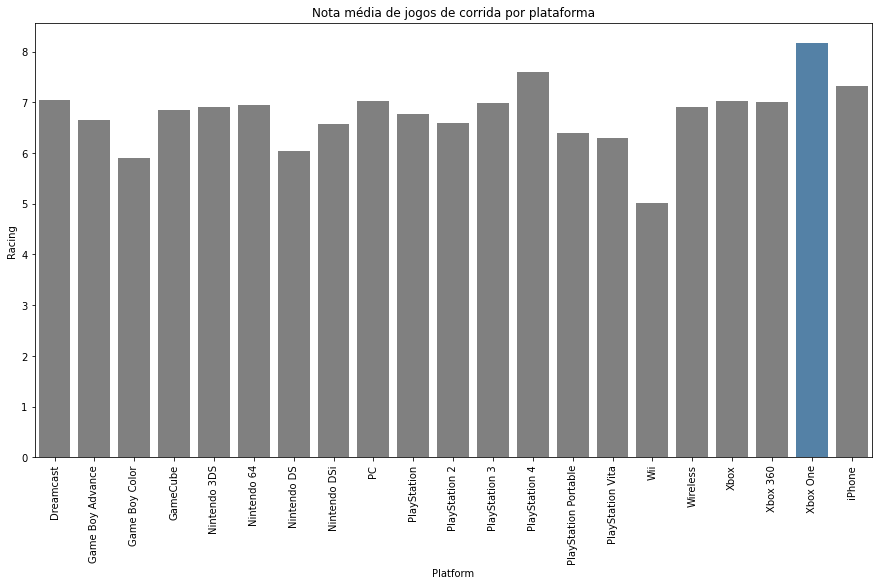

In [9]:
# Como queremos a informação sobre a plataforma "Xbox One" em destaque, podemos alterar a paleta
# de cores das barras destacando a barra referente a plataforma de interesse

col = ['steelblue' if (x == 'Xbox One') else 'grey' for x in ign.index]

plt.figure(figsize=(15,8))

sns.barplot(x=ign.index, y=ign['Racing'], palette=col) # Usando o índice (plataformas) no eixo X e a pontuação
                                              # média dos jogos de simulação no eixo Y

plt.title('Nota média de jogos de corrida por plataforma')
plt.xticks(rotation=90) # rotacionando os índices do eixo X para que não fiquem sobrepostos
plt.show()

# Como podemos ver abaixo, os jogos de corrida na plataforma "Xbox One" tem a maior média de notas.

Podemos fazer uma seleção de variáveis categóricas que temos interesse de visualizar. Por exemplo, queremos visualizar as notas médias referentes a jogos de ação porém só temos interesse nas plataformas com média acima de 7.

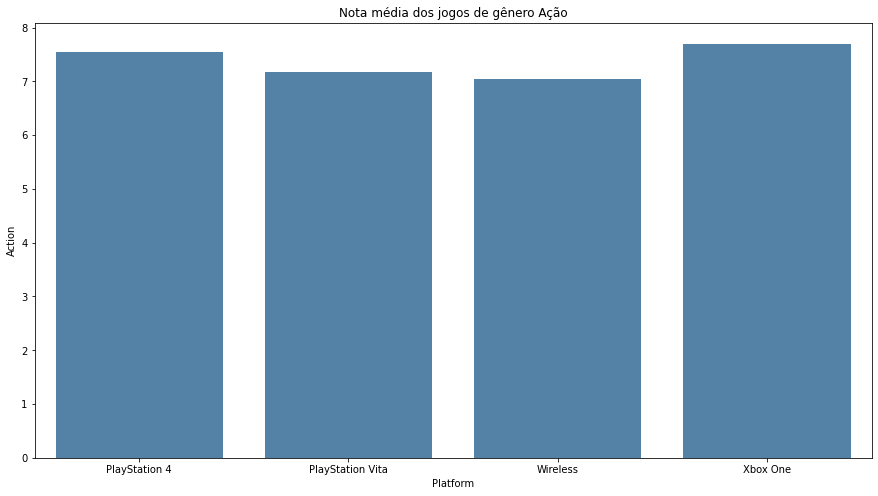

In [10]:
# Primeiro temos que obter os índices (plataformas) onde as notas são superiores a 7:
indices = ign.loc[ign['Action'] > 7].index

# armazenando as colunas em um novo dataset:
df = ign.loc[ign['Action'] > 7]

plt.figure(figsize=(15,8))

sns.barplot(x=indices, y=df['Action'], color='steelblue')
plt.title('Nota média dos jogos de gênero Ação')
plt.show()

# No gráfico abaixo visualizamos as médias das notas dos jogos de ação para as plataformas com 
# média maior que 7.

Heatmap:

Heatmap consiste em uma representação de intensidade por uma escala de cores em uma matriz, esta matriz pode conter o grau de correlação entre as variáveis, sendo assim podemos ver o quão influente cada variável é entre sí. Outro caso são matrizes que armazenam diversos valores para cada variável (como exemplo o nosso conjunto de dados usados acima onde temos varios valores de notas de diferêntes gêneros para cada plataforma).

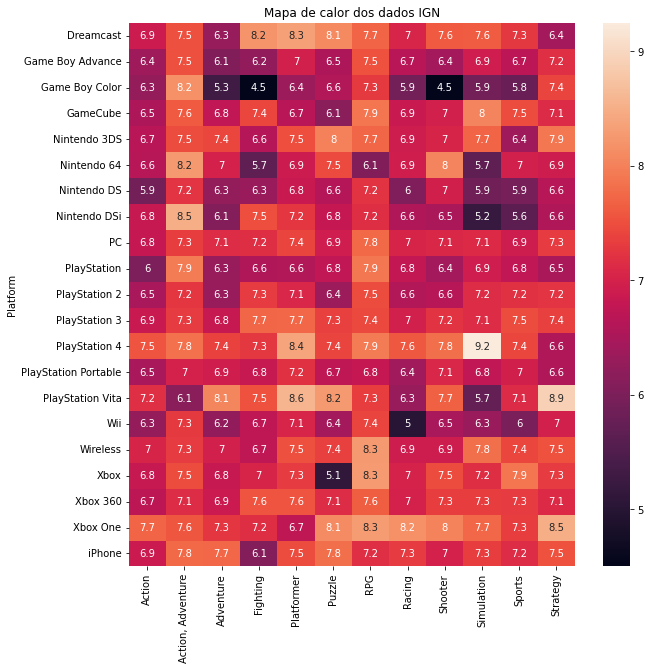

In [11]:
# Podemos visualizar com maior rapidez as notas para plataforma usando um heatmap, esta abordagem pode nos 
# apontar rapidamente valores extremos e dar uma visão geral da distribuição dos dados

plt.figure(figsize=(10,10))

sns.heatmap(data=ign, annot=True) # annot=True mostra os valores numéricos dentro do heatmap

plt.title('Mapa de calor dos dados IGN')
plt.show()

Nos guiando pelas cores com auxílio da escala a direita, identificamos a maior nota média para os jogos de Simuladores na plataforma "Playstastion 4" e as menores notas médias para os jogos de Luta e Tiro na plataforma "Game Boy Color".

Podemos fazer uma breve seleção de dados para mostrar no heatmap:

 Suponha que o interesse principal seja no gênero de Estratégia, podemos selecionar as plataformas com bons jogos de Estratégia e visualizar como são as notas para os demais gêneros dessas plataformas para decidir qual é a melhor:

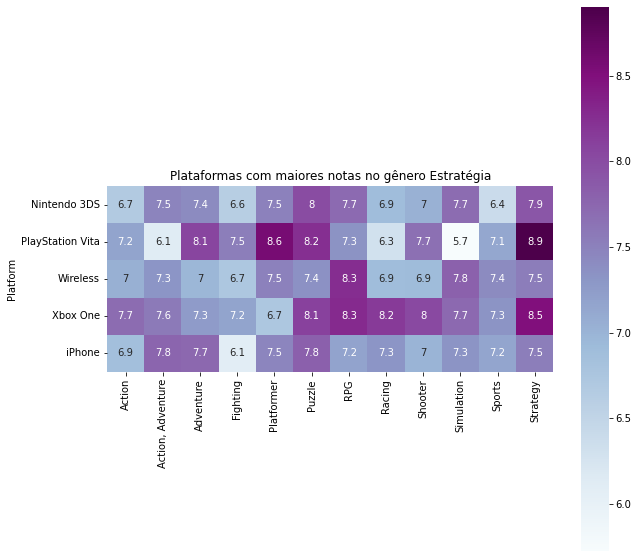

In [12]:
df2 = ign.loc[ign['Strategy'] >= 7.5] # dataset contendo as plataformas onde a nota média dos jogos
                                    # de estratégia é igual ou superior a 7.5

plt.figure(figsize=(10,10))

sns.heatmap(data=df2, annot=True, square=True, cmap="BuPu") # square faz com que cada elemento do 
                                                             #heatmap seja quadrado

plt.title('Plataformas com maiores notas no gênero Estratégia')
plt.show()

# Podemos notar que a plataforma que mais se saí bem é "Xbox One"

O método anterior pode ser usado também quando temos uma variável alvo conhecida e queremos descobrir quais são as variáveis mais influentes sobre o alvo, podemos criar uma matriz de correlação usando o método ".corr()" no dataset e selecionar as linhas com os maiores valores relacionados ao alvo (onde os valores da matriz de correlação variam de -1 a 1)

ScatterPlot:

Scatterplot nos permite ver com facilidade possível correlação entre duas variáveis numéricas.

In [13]:
seguro = pd.read_csv('insurance.csv')

# O dataset abaixo contém dados de clientes de um seguro e o respectivo valor do seguro, com Scatter
# Plots podemos visualizar o quão relacionados algumas variáveis estão com o valor do seguro cobrado

seguro.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


"bmi" representa o índice de massa corporal (IMC), alto IMC está geralmente associado com maior risco de doenças crônicas, logo podemos formular a hipótese de que o valor do seguro é mais alto para pessoas com IMC mais alto:

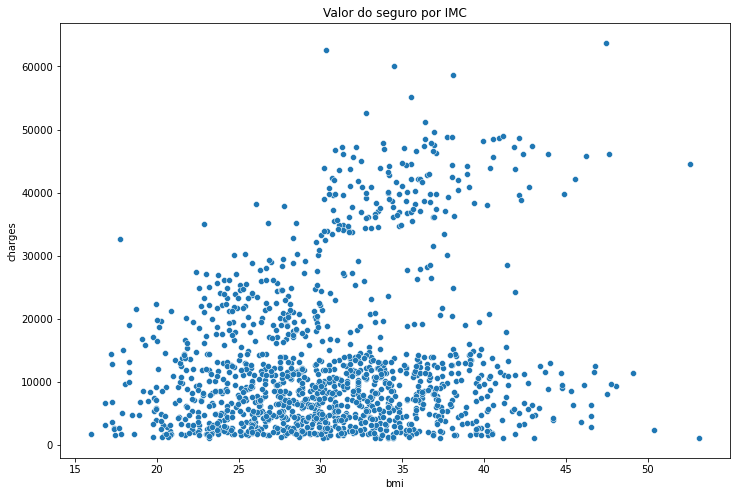

In [14]:
plt.figure(figsize=(12,8))

sns.scatterplot(x=seguro['bmi'], y=seguro['charges'])

plt.title('Valor do seguro por IMC')
plt.show()

# Podemos ver pelo gráfico abaixo que aparentemente existe uma correlação positiva entre
# valor do seguro e IMC

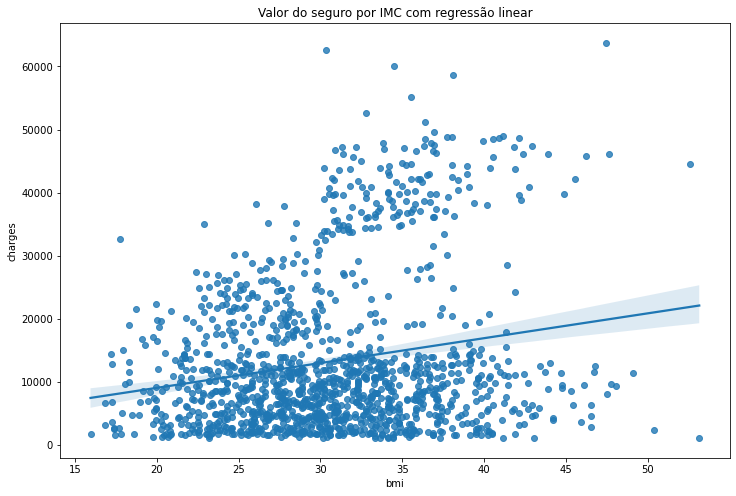

In [15]:
# Podemos inserir uma regressão linear para visualizar se de fato essa correlação existe
# visualizando a inclinação da reta gerada pela regressão

plt.figure(figsize=(12,8))

sns.regplot(x=seguro['bmi'], y=seguro['charges'])

plt.title('Valor do seguro por IMC com regressão linear')
plt.show()

# Confirmamos nossa hipótese inicial

Ainda é possível conhecer a influência do IMC sobre o seguro considerando mais uma variável através da coloração dos pontos. Por exemplo, vamos verificar quais dos pontos no acima são fumantes e vamos testar nossa segunda hipótese de que os valores de seguro são maiores para fumantes:

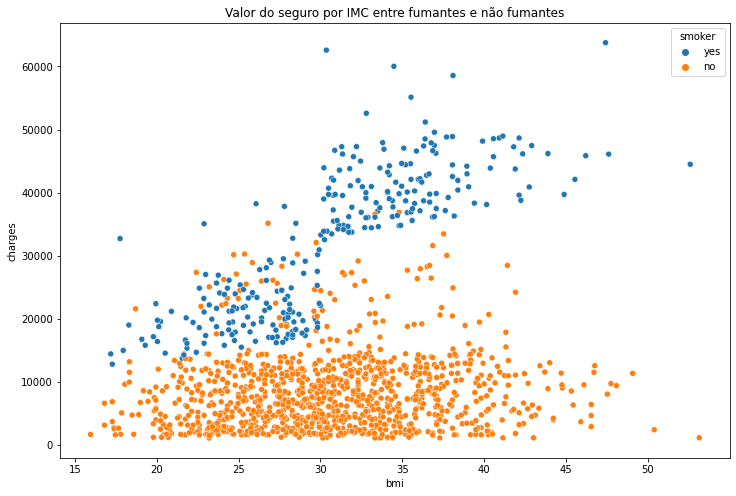

In [16]:
plt.figure(figsize=(12,8))

sns.scatterplot(x=seguro['bmi'], y=seguro['charges'], hue=seguro['smoker'])

plt.title('Valor do seguro por IMC entre fumantes e não fumantes')
plt.show()

# Podemos ver que os valores de seguro aumental significativamente para fumantes

 Podemos notar que o IMC é mais influente no seguro para esses casos, ou seja, a correlação de IMC com o valor do seguro é maior para fumantes. Podemos visualizar isso plotando duas regressões lineares, uma para os fumantes e outra para os não fumantes:

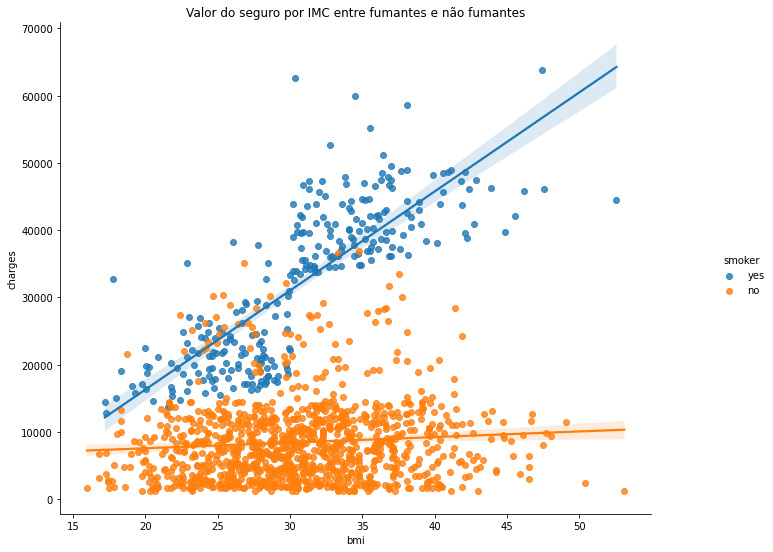

In [17]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=seguro)

plt.gcf().set_size_inches(12, 8)

plt.title('Valor do seguro por IMC entre fumantes e não fumantes')
plt.show()

# Conseguimos visualizar com maior facilidade o aumento da correlação com auxílio das retas

Também é possível construir um scatter plot para uma variável categórica:

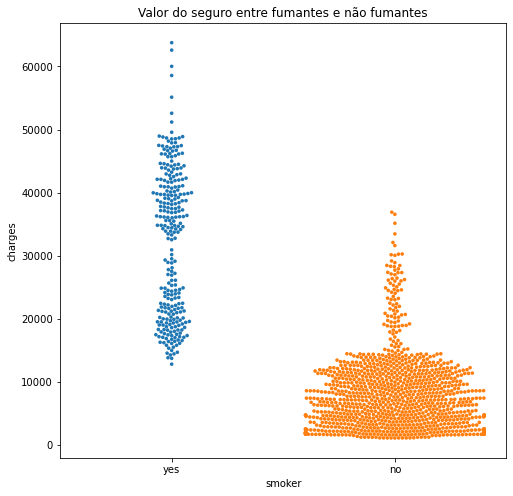

In [18]:
# Relação do valor do seguro para fumantes e não fumantes:

plt.figure(figsize=(8,8))

sns.swarmplot(x=seguro['smoker'], y=seguro['charges'], size=3.6)
# alteramos o tamanho dos marcadores com "size" para poder comportar todos os dados no gráfico

plt.title('Valor do seguro entre fumantes e não fumantes')
plt.show()

Com isso concluímos que em média não fumantes pagam menos e que os seguros mais caros são de fumantes.

Gráficos para densidades:

Muitas vezes é importante analisar a densidade da distribuição de uma dada variável, seja para saber a melhor forma de preencher dados faltantes ou algorítmo de ML a ser usado nelas até para criar distínções para ver como os dados se distribuem em relação a uma variável alvo.

In [20]:
cancer = pd.read_csv('cancer.csv', index_col='Id')

# O dataset a seguir contém dados que classificam se um tumor é maligno ou benigno com base em
# informações coletadas por imagens de microscópios

cancer.head()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


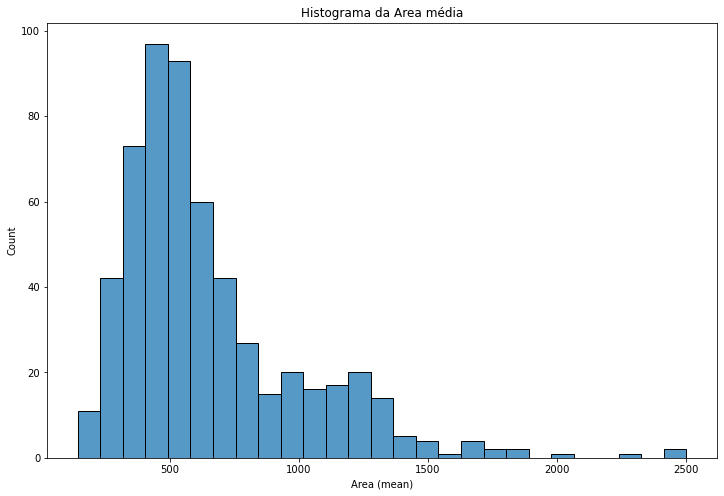

In [22]:
# Podemos visualizar como os dados de área média de um tumor se distribuem através de um
# histograma, que utiliza barras para mostrar a contagem de dados dentro de intervalos

plt.figure(figsize=(12,8))

sns.histplot(data=cancer, x='Area (mean)')

plt.title('Histograma da Area média')
plt.show()

# O histograma abaixo mostra que existe uma maior concentração de valores em 
# torno do valor 500 para área média

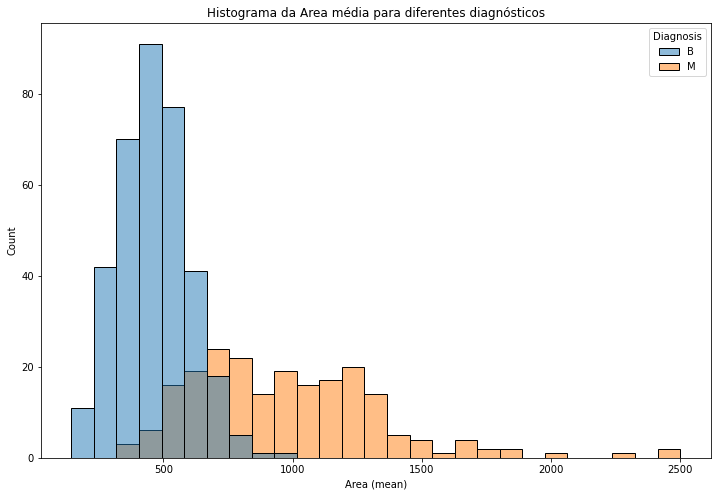

In [27]:
# Agora vamos diferenciar as áreas relativas a tumores malignos e benignos para extrair
# informações sobre a relação entre a área média e o diagnóstico

plt.figure(figsize=(12,8))

sns.histplot(data=cancer, x='Area (mean)', hue='Diagnosis')

plt.title('Histograma da Area média para diferentes diagnósticos')
plt.show()

# Notamos que maiores valores de área média estão associados a tumores malignos e que estes valores
# apresentam um maior desvio padrão, ou seja, os dados são mais dispersos

Podemos utilizar um plot de densidade estimada (KDE) para obter uma curva suave de distribuição de densidade, gráficos desta natureza facilitam a análise do gráfico através da matemática, uma vez que podemos aproximar a curva gerada pelo plot por uma função e com ela obter informações através da sua derivada e integral

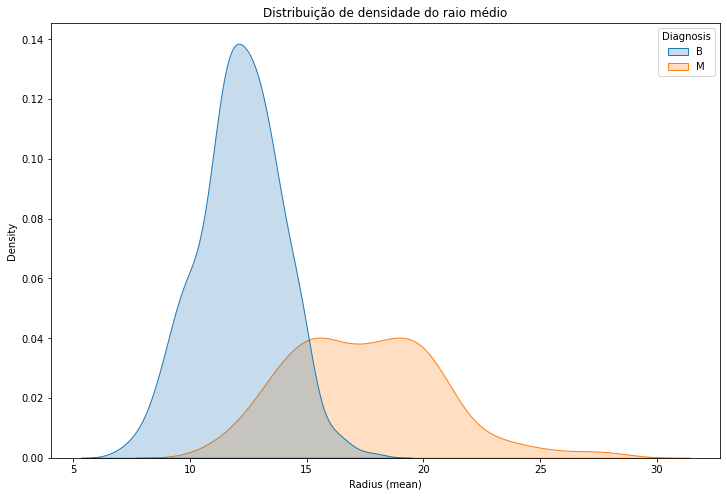

In [26]:
# Vamos obter uma distribuição de densidade para o raio médio dos tumores.
# Sabemos que a maiores áreas médias estão associadas a tumores malignos, logo
# podemos supor que um raio médio também tem uma associação análoga

plt.figure(figsize=(12,8))

sns.kdeplot(data=cancer, x='Radius (mean)', hue='Diagnosis', fill=True)
# fill colore a área abaixo da curva e facilita a visualização das densidades
# e das suas possíveis interseções

plt.title('Distribuição de densidade do raio médio')
plt.show()

Aqui exploramos algumas estruturas gráficas da biblioteca Seaborn onde visualizamos Tendências, relações entre variáveis numéricas e categóricas e algumas distribuições e observamos como é possível verificar algumas hipóteses e insights a partir dos gráficos.

Existem varias outras estruturas que podem facilitar a visualização de diferentes conjuntos de dados e que podemos tomar decisões de como tratar os dados após conhece-los melhor. Por exemplo se uma variável tem uma correlação com o alvo para incluí-la em um modelo de ML ou qual método utilizar para remover outliers.